In [1]:
import pandas as pd
from cloudant.client import Cloudant
from cloudant.result import Result
from Cloudant_cred import serviceUsername, servicePassword, serviceURL
import datetime
import numpy as np

In [2]:
client = Cloudant(serviceUsername, servicePassword, url=serviceURL)
client.connect()

In [3]:
session = client.session()
# print('Username: {0}'.format(session['userCtx']['name']))
print('Databases: {0}'.format(client.all_dbs()))

Databases: ['ballscrew', 'noderedflvfz20210419', 'training']


In [4]:
traindb = client['ballscrew']

In [5]:
result_collection = Result(traindb.all_docs, include_docs=True)

In [6]:
Data = pd.DataFrame.from_records(pd.DataFrame.from_records(result_collection.all())['doc']).drop(['_id','_rev'], axis=1)
Data

,Current,Step,AX,AY,AZ,class,timestamp
0,236500,3,15007,569,890,0,1623525581887
1,93500,3,15007,569,890,0,1623525590890
2,-292600,4,15007,569,890,0,1623525592887
3,178200,1,15007,569,890,0,1623525594887
4,-134200,2,15007,569,890,0,1623525597886
...,...,...,...,...,...,...,...
2219102,-497200,2,-1,-1,-1,0,1625556000245
2219103,-501600,2,-1,-1,-1,0,1625556005243
2219104,-504900,2,-1,-1,-1,0,1625556006242
2219105,-506000,2,-1,-1,-1,0,1625556007242


In [7]:
client.disconnect()

In [8]:
Data['Datetime'] = pd.DataFrame((datetime.datetime.fromtimestamp(d) for d in Data['timestamp']/1000))
Data

,Current,Step,AX,AY,AZ,class,timestamp,Datetime
0,236500,3,15007,569,890,0,1623525581887,2021-06-12 21:19:41.887
1,93500,3,15007,569,890,0,1623525590890,2021-06-12 21:19:50.890
2,-292600,4,15007,569,890,0,1623525592887,2021-06-12 21:19:52.887
3,178200,1,15007,569,890,0,1623525594887,2021-06-12 21:19:54.887
4,-134200,2,15007,569,890,0,1623525597886,2021-06-12 21:19:57.886
...,...,...,...,...,...,...,...,...
2219102,-497200,2,-1,-1,-1,0,1625556000245,2021-07-06 09:20:00.245
2219103,-501600,2,-1,-1,-1,0,1625556005243,2021-07-06 09:20:05.243
2219104,-504900,2,-1,-1,-1,0,1625556006242,2021-07-06 09:20:06.242
2219105,-506000,2,-1,-1,-1,0,1625556007242,2021-07-06 09:20:07.242


In [9]:
Data.sort_values('timestamp', inplace=True)
Data.drop('timestamp', axis=1, inplace=True)
Data

,Current,Step,AX,AY,AZ,class,Datetime
1957685,-344300,4,25666,-3965,-18376,0,2021-06-10 19:41:42.862
1807839,-369600,4,20356,6517,1432,0,2021-06-10 19:41:42.862
1518716,-327800,4,13937,6692,4132,0,2021-06-10 19:41:42.862
131401,-353100,4,19690,-5231,-12476,0,2021-06-10 19:41:42.862
131400,-347600,4,22165,-3060,170,0,2021-06-10 19:41:42.862
...,...,...,...,...,...,...,...
484953,-542300,2,-1,-1,-1,0,2021-07-06 15:12:06.016
1202879,-537900,2,-1,-1,-1,0,2021-07-06 15:12:06.016
743553,-528000,2,-1,-1,-1,0,2021-07-06 15:12:07.006
1178513,-553300,2,-1,-1,-1,0,2021-07-06 15:12:07.006


In [10]:
Data.reset_index(inplace=True)
Data.drop('index', axis=1, inplace=True)
Data

,Current,Step,AX,AY,AZ,class,Datetime
0,-344300,4,25666,-3965,-18376,0,2021-06-10 19:41:42.862
1,-369600,4,20356,6517,1432,0,2021-06-10 19:41:42.862
2,-327800,4,13937,6692,4132,0,2021-06-10 19:41:42.862
3,-353100,4,19690,-5231,-12476,0,2021-06-10 19:41:42.862
4,-347600,4,22165,-3060,170,0,2021-06-10 19:41:42.862
...,...,...,...,...,...,...,...
2219102,-542300,2,-1,-1,-1,0,2021-07-06 15:12:06.016
2219103,-537900,2,-1,-1,-1,0,2021-07-06 15:12:06.016
2219104,-528000,2,-1,-1,-1,0,2021-07-06 15:12:07.006
2219105,-553300,2,-1,-1,-1,0,2021-07-06 15:12:07.006


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
Data = Data[Data.Step < 5]
Data = Data[Data.Step > 0]

In [13]:
# std = Data.describe().loc['std']
# std

In [14]:
# for col in ['Current', 'AX', 'AY', 'AZ']:
#     Data[col] = Data[col] / std[col]

In [15]:
Data['Step'] = Data['Step'] * 100000
Data['AX'] = Data['AX'] * 10
Data['AY'] = Data['AY'] * 10
Data['AZ'] = Data['AZ'] * 10
Data

,Current,Step,AX,AY,AZ,class,Datetime
0,-344300,400000,256660,-39650,-183760,0,2021-06-10 19:41:42.862
1,-369600,400000,203560,65170,14320,0,2021-06-10 19:41:42.862
2,-327800,400000,139370,66920,41320,0,2021-06-10 19:41:42.862
3,-353100,400000,196900,-52310,-124760,0,2021-06-10 19:41:42.862
4,-347600,400000,221650,-30600,1700,0,2021-06-10 19:41:42.862
...,...,...,...,...,...,...,...
2219102,-542300,200000,-10,-10,-10,0,2021-07-06 15:12:06.016
2219103,-537900,200000,-10,-10,-10,0,2021-07-06 15:12:06.016
2219104,-528000,200000,-10,-10,-10,0,2021-07-06 15:12:07.006
2219105,-553300,200000,-10,-10,-10,0,2021-07-06 15:12:07.006


In [16]:
Abnormal = Data[Data['class'] == 1]
Normal = Data[Data['class'] == 0][Data.AX != -10][Data.AX != 0]

<ipython-input-16-21ebfb377489>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Normal = Data[Data['class'] == 0][Data.AX != -10][Data.AX != 0]
<ipython-input-16-21ebfb377489>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Normal = Data[Data['class'] == 0][Data.AX != -10][Data.AX != 0]


(-3000000.0, 3000000.0)

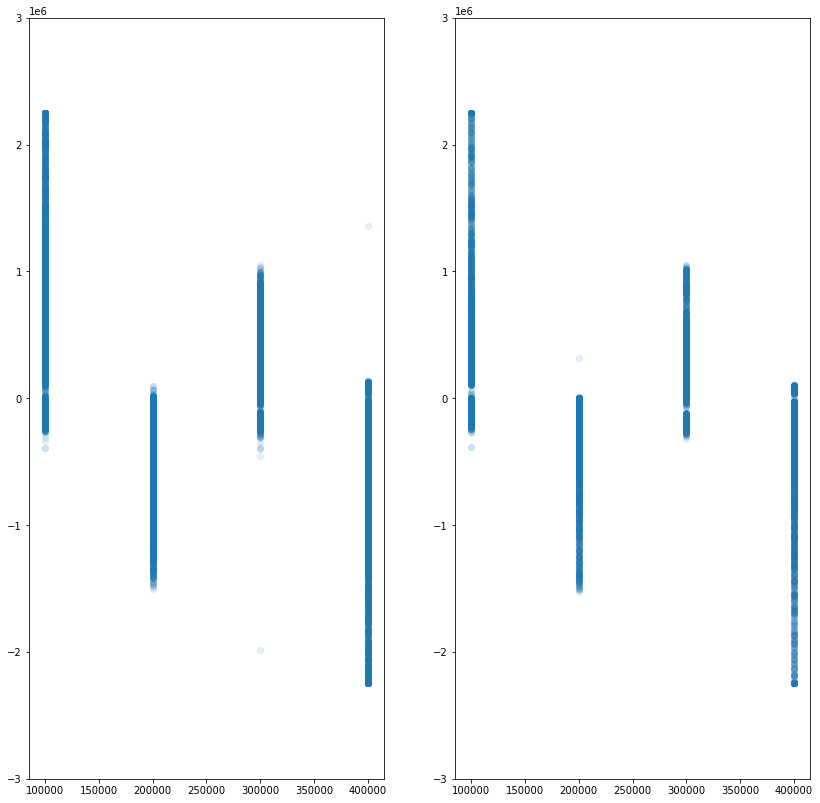

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 14))
ax[0].scatter(Normal['Step'], Normal['Current'], alpha=0.1)
ax[1].scatter(Abnormal['Step'], Abnormal['Current'], alpha=0.1)

ax[0].set_ylim((-3e6, 3e6))
ax[1].set_ylim((-3e6, 3e6))

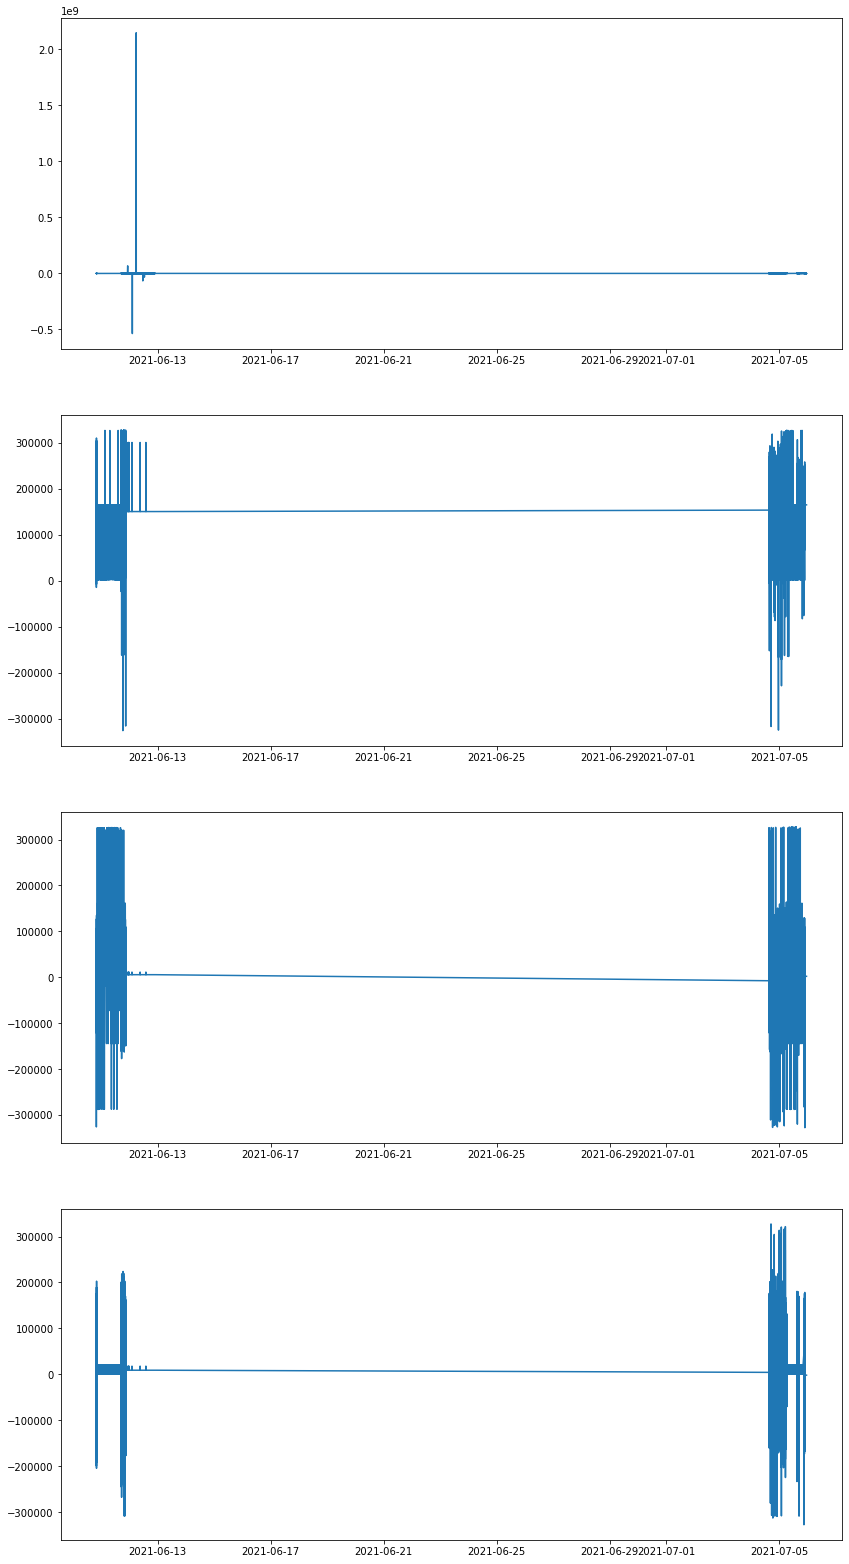

In [18]:
fig, ax = plt.subplots(4,1, figsize=(14,28))
ax[0].plot(Normal.Datetime, Normal.Current)
ax[1].plot(Normal.Datetime, Normal.AX)
ax[2].plot(Normal.Datetime, Normal.AY)
ax[3].plot(Normal.Datetime, Normal.AZ)

<ipython-input-19-cc5b9d71452d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Abnormal_fault['class'] = 1


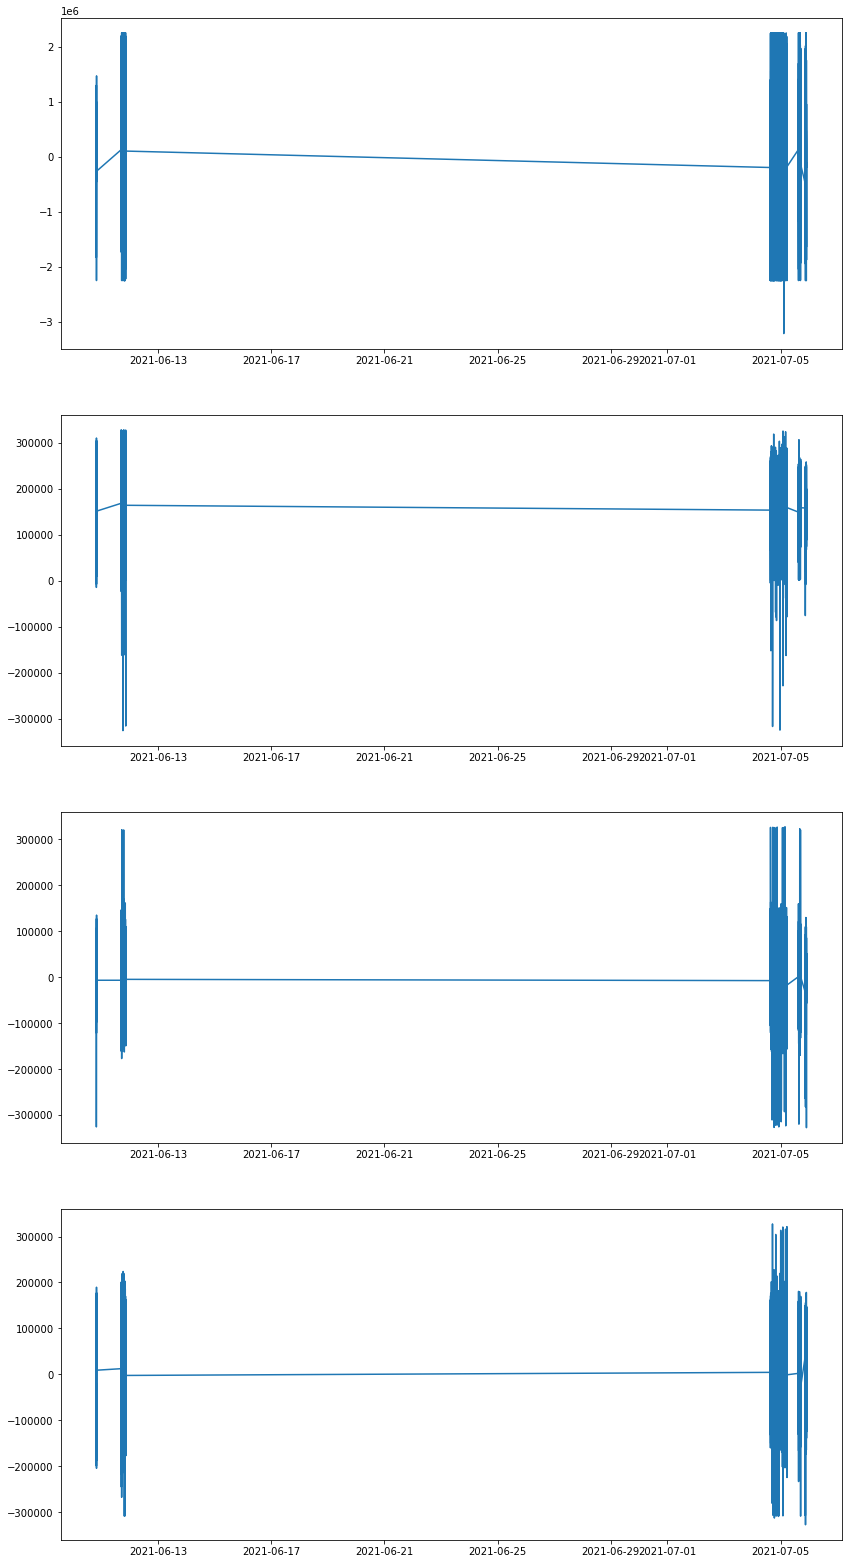

In [19]:
# condition = (Normal.Datetime > datetime.datetime(2021, 6, 11, 20, 41)) & (Normal.Datetime < datetime.datetime(2021, 6, 11, 20, 41, 20))
condition1 = (Normal.Datetime > datetime.datetime(2021, 6, 11, 16, 46, 45)) & \
             (Normal.Datetime < datetime.datetime(2021, 6, 11, 20, 41, 10))
condition2 = (Normal.Datetime < datetime.datetime(2021, 6, 10, 19, 54)) & \
             (Normal.Datetime < datetime.datetime(2021, 6, 16))
condition3 = (Normal.Datetime > datetime.datetime(2021, 7, 4)) & \
             (Normal.Datetime < datetime.datetime(2021, 7, 5, 5, 35, 48))
condition4 = (Normal.Datetime > datetime.datetime(2021, 7, 5, 15, 7, 0)) & \
             (Normal.Datetime < datetime.datetime(2021, 7, 5, 17, 6, 17))
condition5 = (Normal.Datetime > datetime.datetime(2021, 7, 5, 20, 30, 15)) & \
            (Normal.Datetime < datetime.datetime(2021, 7, 5, 22))

condition = condition1 | condition2 | condition3 | condition4 | condition5

Normal_filtered = Normal[condition]
Abnormal_fault = Normal[~condition]
Abnormal_fault['class'] = 1

fig, ax = plt.subplots(4,1, figsize=(14,28))
ax[0].plot(Normal_filtered.Datetime, Normal_filtered.Current)
ax[1].plot(Normal_filtered.Datetime, Normal_filtered.AX)
ax[2].plot(Normal_filtered.Datetime, Normal_filtered.AY)
ax[3].plot(Normal_filtered.Datetime, Normal_filtered.AZ)

,Current,Step,AX,AY,AZ,class,Datetime
3690,111100,300000,171860,-3820,-11920,1,2021-06-10 19:54:00.874
3691,173800,300000,164930,-28640,-14040,1,2021-06-10 19:54:00.874
3692,-159500,300000,157880,-8690,-5500,1,2021-06-10 19:54:00.874
3693,-305800,200000,167060,-9080,-6220,1,2021-06-10 19:54:00.874
3694,196900,300000,148060,-1860,50840,1,2021-06-10 19:54:00.874
...,...,...,...,...,...,...,...
1933352,-224400,300000,164660,2160,-1880,1,2021-07-05 23:19:36.643
1933353,-146300,200000,164660,2160,-1880,1,2021-07-05 23:19:36.643
1933354,168300,300000,164660,2160,-1880,1,2021-07-05 23:19:37.656
1933356,129800,300000,164660,2160,-1880,1,2021-07-05 23:19:37.656


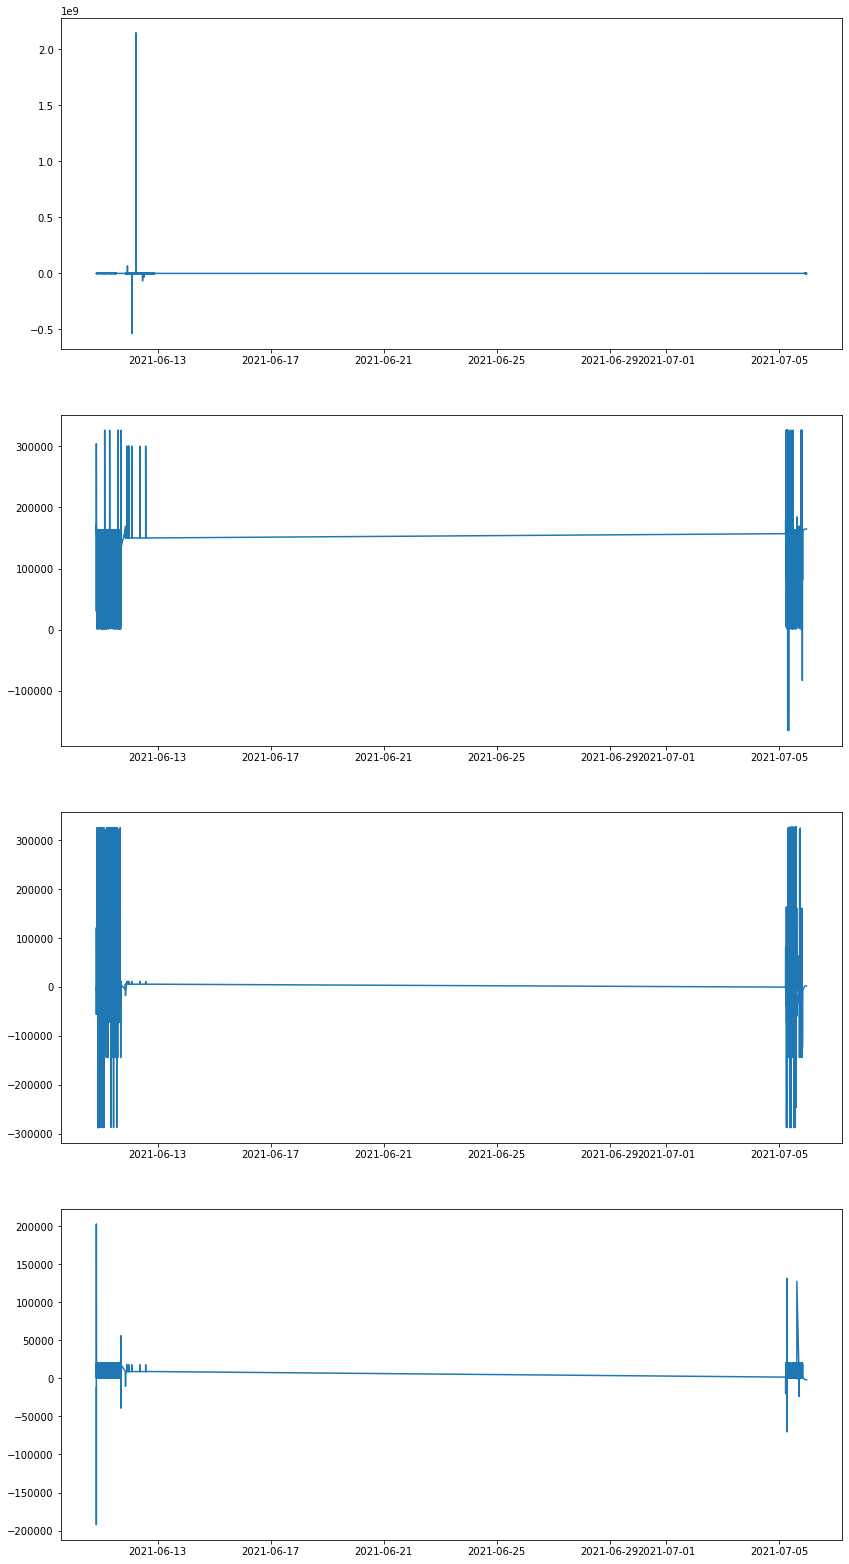

In [20]:
fig, ax = plt.subplots(4,1, figsize=(14,28))
ax[0].plot(Abnormal_fault.Datetime, Abnormal_fault.Current)
ax[1].plot(Abnormal_fault.Datetime, Abnormal_fault.AX)
ax[2].plot(Abnormal_fault.Datetime, Abnormal_fault.AY)
ax[3].plot(Abnormal_fault.Datetime, Abnormal_fault.AZ)
Abnormal_fault

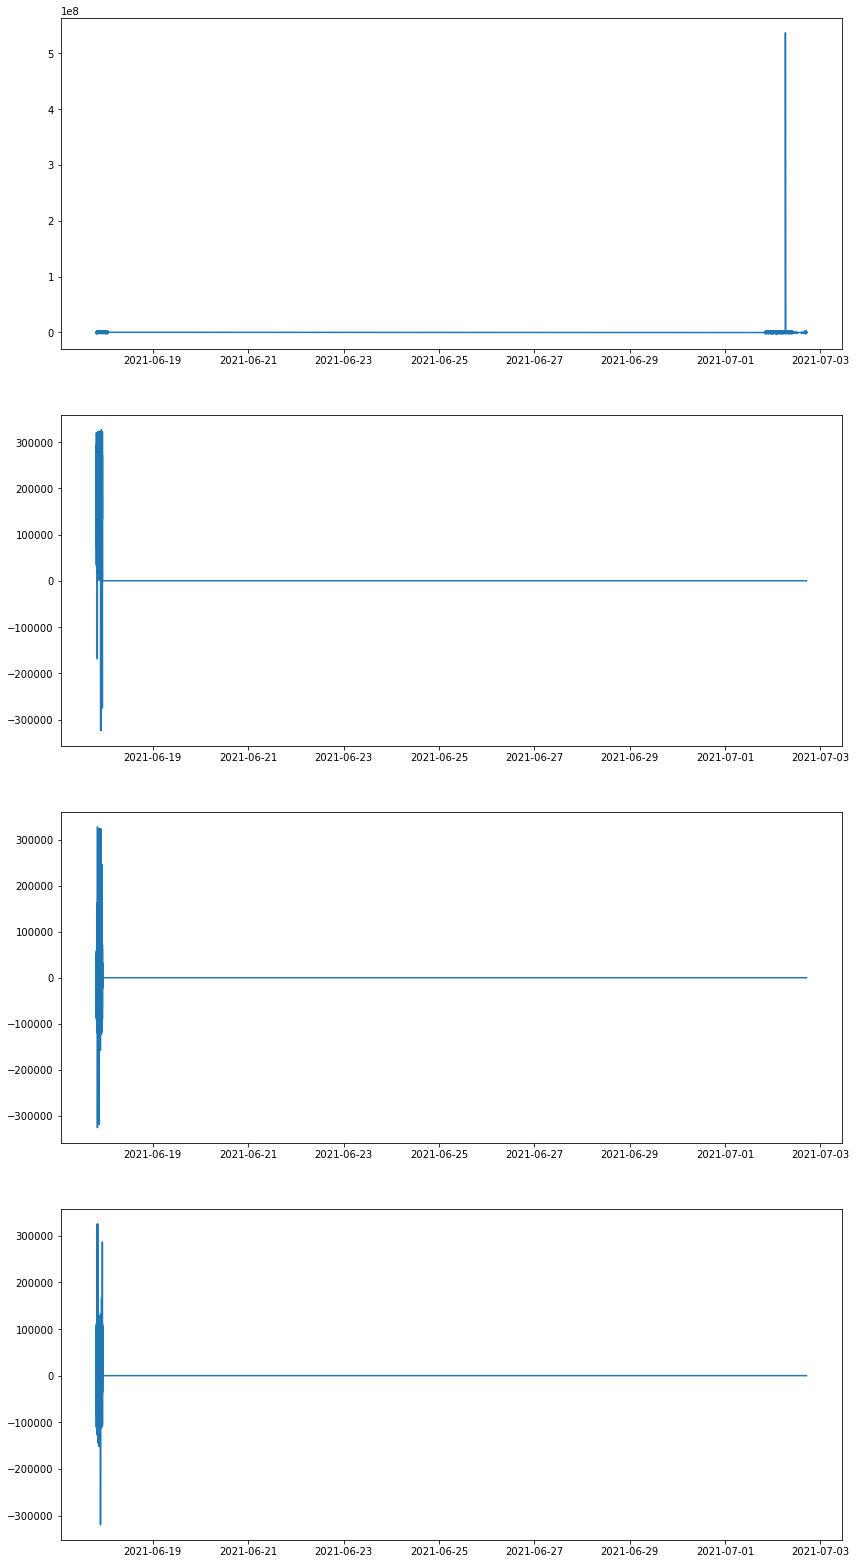

In [21]:
fig, ax = plt.subplots(4,1, figsize=(14,28))
ax[0].plot(Abnormal.Datetime, Abnormal.Current)
ax[1].plot(Abnormal.Datetime, Abnormal.AX)
ax[2].plot(Abnormal.Datetime, Abnormal.AY)
ax[3].plot(Abnormal.Datetime, Abnormal.AZ)

In [22]:
condition = Abnormal.Datetime < datetime.datetime(2021, 6, 17, 22, 39)
Abnormal_filtered = Abnormal[condition]

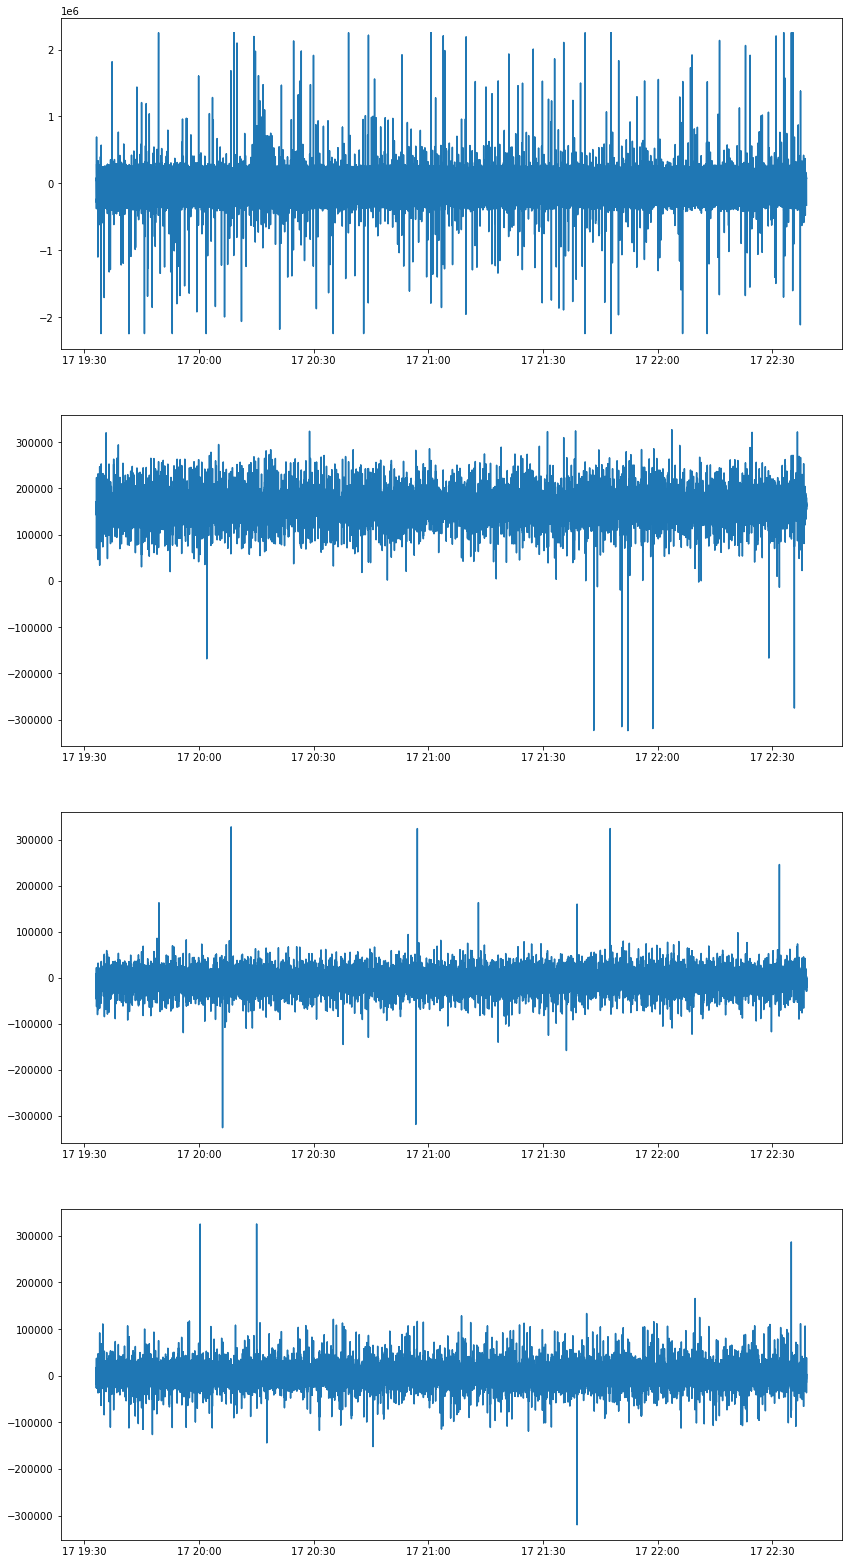

In [23]:
fig, ax = plt.subplots(4,1, figsize=(14,28))
ax[0].plot(Abnormal_filtered.Datetime, Abnormal_filtered.Current)
ax[1].plot(Abnormal_filtered.Datetime, Abnormal_filtered.AX)
ax[2].plot(Abnormal_filtered.Datetime, Abnormal_filtered.AY)
ax[3].plot(Abnormal_filtered.Datetime, Abnormal_filtered.AZ)

In [24]:
ds = pd.concat([Normal_filtered, Abnormal, Abnormal_fault])
ds.index.name = 'id'
ds

,Current,Step,AX,AY,AZ,class,Datetime
id,,,,,,,
0,-344300,400000,256660,-39650,-183760,0,2021-06-10 19:41:42.862
1,-369600,400000,203560,65170,14320,0,2021-06-10 19:41:42.862
2,-327800,400000,139370,66920,41320,0,2021-06-10 19:41:42.862
3,-353100,400000,196900,-52310,-124760,0,2021-06-10 19:41:42.862
4,-347600,400000,221650,-30600,1700,0,2021-06-10 19:41:42.862
...,...,...,...,...,...,...,...
1933352,-224400,300000,164660,2160,-1880,1,2021-07-05 23:19:36.643
1933353,-146300,200000,164660,2160,-1880,1,2021-07-05 23:19:36.643
1933354,168300,300000,164660,2160,-1880,1,2021-07-05 23:19:37.656


In [25]:
ds.sort_values('id', inplace=True)
ds

,Current,Step,AX,AY,AZ,class,Datetime
id,,,,,,,
0,-344300,400000,256660,-39650,-183760,0,2021-06-10 19:41:42.862
1,-369600,400000,203560,65170,14320,0,2021-06-10 19:41:42.862
2,-327800,400000,139370,66920,41320,0,2021-06-10 19:41:42.862
3,-353100,400000,196900,-52310,-124760,0,2021-06-10 19:41:42.862
4,-347600,400000,221650,-30600,1700,0,2021-06-10 19:41:42.862
...,...,...,...,...,...,...,...
1933352,-224400,300000,164660,2160,-1880,1,2021-07-05 23:19:36.643
1933353,-146300,200000,164660,2160,-1880,1,2021-07-05 23:19:36.643
1933354,168300,300000,164660,2160,-1880,1,2021-07-05 23:19:37.656


In [26]:
ds.shape

(1933337, 7)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Softmax, Dropout, Flatten, Input

In [28]:
ds.drop('Datetime', axis=1, inplace=True)

In [29]:
# TODO: Add scaling
seq_len = 12**2
X = list()
y = list()
for i in range(seq_len, len(ds)-seq_len):
    X.append(ds.iloc[i-seq_len:i][['Step', 'Current', 'AX', 'AY', 'AZ']].__array__().reshape([-1,5,1]))
    # Step = ds.iloc[i-seq_len:i][['Step']].__array__().reshape((12, 12))
    # Current = ds.iloc[i-seq_len:i][['Current']].__array__().reshape((12, 12))
    # AX = ds.iloc[i-seq_len:i][['AX']].__array__().reshape((12, 12))
    # AY = ds.iloc[i-seq_len:i][['AY']].__array__().reshape((12, 12))
    # AZ = ds.iloc[i-seq_len:i][['AZ']].__array__().reshape((12, 12))
    # X.append(np.dstack([Step, Current, AX, AY, AZ]))
    y.append(ds.iloc[i-1]['class'].__array__())

In [30]:
X, y = np.array(X), np.array(y)

In [31]:
X.shape

(1933049, 144, 5, 1)

In [32]:
y.shape

(1933049,)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(1546439, 144, 5, 1)

In [36]:
y_train.shape

(1546439,)

In [37]:
X_test.shape

(386610, 144, 5, 1)

In [38]:
y_test.shape

(386610,)

In [39]:
del X, y

In [40]:
import os
if os.path.isfile("NN.h5"):
    model = tf.keras.models.load_model("NN.h5")
else:
    rf_input = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
    model = Dense(64, activation='relu')(rf_input)
    model = Dropout(0.2)(model)
    model = Dense(64, activation='relu')(model)
    model = Dropout(0.2)(model)
    model = Dense(8, activation='relu')(model)
    model = Dropout(0.2)(model)
    model = Flatten()(model)
    model = Dropout(0.2)(model)
    model = Dense(8, activation='relu')(model)
    model = Dropout(0.2)(model)
    model = Dense(1, activation='relu')(model)
    model = tf.keras.Model(rf_input, model)

In [41]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 144, 5, 1)]       0         
_________________________________________________________________
dense (Dense)                (None, 144, 5, 64)        128       
_________________________________________________________________
dropout (Dropout)            (None, 144, 5, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 144, 5, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 5, 64)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 144, 5, 8)         520       
_________________________________________________________________
dropout_2 (Dropout)          (None, 144, 5, 8)        

In [42]:
model.compile(optimizer='adam', loss=tf.losses.binary_crossentropy, metrics=['accuracy'])

In [43]:
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [44]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1024,
          callbacks=[model_checkpoint_callback])

Epoch 1/10
1511/1511 [==============================] - 1994s 1s/step - loss: 3.9525 - accuracy: 0.7309 - val_loss: 3.0428 - val_accuracy: 0.8005

In [45]:
model.load_weights(checkpoint_filepath)
model.save("NN.h5")

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred.shape

(386610, 1)

In [48]:
y_pred_rs = y_pred.reshape(-1)
y_pred_rs.shape

(386610,)

In [49]:
y_test.shape

(386610,)

In [50]:
def F1_score(true_val, pred_val):
    TP = sum(true_val & pred_val)
    # TN = sum((~true_val - min(~true_val)) & (~pred_val - min(~pred_val)))
    FN = sum(true_val & (~pred_val - min(~pred_val)))
    FP = sum((~true_val - min(~true_val)) & pred_val)

    return TP / (TP + (FP + FN)/2)

In [51]:
result = F1_score(y_test.astype('int'), y_pred_rs.astype('int'))
result


0.6154702613501933